In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import pickle
import re
%matplotlib inline

In [90]:
with open(r"movie_DF_0426.p", "rb") as input_file:
    mov = pickle.load(input_file)

In [91]:
mov.head()

,director,distributor,genre_bomojo,rating,title,releaseDate,canontitle,rev_totalGross,rev_opening,num_theaters,...,releaseYear,Year,AvgPrice,rev_opening_ADJ,rev_totalGross_ADJ,year,CPI,prod_budget_ADJ,isCult,CULT_INDEX
2954,William Gazecki,Somford Entertainment,Documentary,Unrated,Waco: The Rules of Engagement,1997-02-28,waco,271114.653333,5,1740,...,1997,1997,4.5,9.533333,271114.653333,1997,160.5,0,NaN,1.714408
3445,Craig Mazin,Regent Releasing,Unknown,R,The Specials,2000-09-22,specials,21492.090566,2,1740,...,2000,2000,5.3,3.237736,21492.090566,2000,172.2,0,NaN,1.178275
3416,Robert Lee King,Strand,Horror Comedy,Unrated,Psycho Beach Party,2000-08-04,psychobeachparty,434046.011321,11,1740,...,2000,2000,5.3,17.807547,434046.011321,2000,172.2,0,NaN,0.786644
1206,Jonathan Demme,Cinecom,Unknown,R,Swimming to Cambodia,1987-03-13,swimmingtocambodia,2404404.200000,21,1740,...,1987,1987,3.9,46.200000,2404404.200000,1987,113.6,0,NaN,0.647402
846,Paul Schrader,Warner Bros.,Unknown,R,Mishima: A Life in Four Chapters,1985-09-13,mishima,1072615.217143,14,1740,...,1985,1985,3.5,34.320000,1072615.217143,1985,107.6,0,1,0.523360


In [85]:
#bomojo_adj = pd.read_csv('./bomojo_ticket_price_adjuster.csv',header=0)
#bomojo_adj.columns=bomojo_adj.columns.str.replace('\.\s','')
#bomojo_adj.AvgPrice = bomojo_adj.AvgPrice.str.replace('$','').astype('float')
#cpi = pd.read_csv("./cpi_by_year.csv", header=0)
#cpi.columns=cpi.columns.str.replace('\.\s','')
#cpi['CPI']=cpi.CPI.astype('float')
#cpi['year']=cpi.year.astype('int')

#bomojo_adj.head()


,Year,AvgPrice
0,2016,8.58
1,2015,8.40
2,2014,8.10
3,2013,8.10
4,2012,7.90


In [86]:
#mov['releaseYear'] = mov.releaseDate.apply(lambda val: val.year)

In [87]:
#mov=mov.merge(bomojo_adj, left_on='releaseYear', right_on='Year', how='left')
#mov=mov.merge(cpi, left_on='releaseYear', right_on='year', how='left')
#mov['AvgPrice']=mov.AvgPrice.astype('float')



In [88]:
mov.columns

Index([u'director', u'distributor', u'genre_bomojo', u'rating', u'title',
       u'releaseDate', u'canontitle', u'rev_totalGross', u'rev_opening',
       u'num_theaters', u'runtime', u'prod_budget', u'rev_postOpening',
       u'leadActor', u'runtime_mins', u'releaseYear', u'Year_x', u'AvgPrice_x',
       u'rev_opening_ADJ', u'rev_totalGross_ADJ', u'year_x', u'CPI_x',
       u'prod_budget_ADJ', u'isCult', u'CULT_INDEX', u'Year_y', u'AvgPrice_y',
       u'year_y', u'CPI_y'],
      dtype='object')

In [80]:
#mov['rev_opening_ADJ'] = (mov.rev_opening/mov.AvgPrice)*8.58

In [81]:
#mov['rev_totalGross_ADJ'] = (mov.rev_totalGross/mov.AvgPrice)*8.58 #2016 ticket prices

In [82]:
#mov['rev_postOpening'] = mov.rev_totalGross_ADJ - mov.rev_opening_ADJ 

In [83]:
#mov['prod_budget_ADJ'] = (mov.prod_budget/mov.CPI) * 238 #2016 CPI

AttributeError: 'DataFrame' object has no attribute 'CPI'

In [92]:
mov.head()

,director,distributor,genre_bomojo,rating,title,releaseDate,canontitle,rev_totalGross,rev_opening,num_theaters,...,releaseYear,Year,AvgPrice,rev_opening_ADJ,rev_totalGross_ADJ,year,CPI,prod_budget_ADJ,isCult,CULT_INDEX
2954,William Gazecki,Somford Entertainment,Documentary,Unrated,Waco: The Rules of Engagement,1997-02-28,waco,271114.653333,5,1740,...,1997,1997,4.5,9.533333,271114.653333,1997,160.5,0,NaN,1.714408
3445,Craig Mazin,Regent Releasing,Unknown,R,The Specials,2000-09-22,specials,21492.090566,2,1740,...,2000,2000,5.3,3.237736,21492.090566,2000,172.2,0,NaN,1.178275
3416,Robert Lee King,Strand,Horror Comedy,Unrated,Psycho Beach Party,2000-08-04,psychobeachparty,434046.011321,11,1740,...,2000,2000,5.3,17.807547,434046.011321,2000,172.2,0,NaN,0.786644
1206,Jonathan Demme,Cinecom,Unknown,R,Swimming to Cambodia,1987-03-13,swimmingtocambodia,2404404.200000,21,1740,...,1987,1987,3.9,46.200000,2404404.200000,1987,113.6,0,NaN,0.647402
846,Paul Schrader,Warner Bros.,Unknown,R,Mishima: A Life in Four Chapters,1985-09-13,mishima,1072615.217143,14,1740,...,1985,1985,3.5,34.320000,1072615.217143,1985,107.6,0,1,0.523360


In [93]:
# Finally, play around with CULT INDEX Formula!!
# BUT....  we need CULT status
def label_as_cult(mov):
    """assigns cult status to movies by comparing to cult list. New binary column created."""
    cultlist = pd.read_csv('./imdb_cult_movie_list.csv', header=0)
    mov = mov.merge(cultlist, on_right='title', how='left')



In [94]:
mov['CULT_INDEX'] = mov.rev_totalGross_ADJ/((mov.rev_opening_ADJ**2)*(mov.num_theaters))
mov=mov.sort_values(by='CULT_INDEX',ascending=False)

In [95]:
pickle.dump(mov, open('movie_DF_0427.p', 'wb'))

In [96]:
#MANUALLY ASSIGN SOME MORE CULT STATUSES
mov.to_csv('./movie_df.csv',header=True,encoding='utf-8')

In [72]:
mov = pd.read_csv('./movie_df.csv',header=0,encoding='utf-8')

In [202]:



with open(r"movie_DF_0427.p", "rb") as input_file:
    mov = pickle.load(input_file)

In [203]:
mov['rev_totalGross_ADJ'] = (mov.rev_totalGross/mov.AvgPrice)*8.58 #2016 ticket prices
mov['prod_budget_ADJ'] = (mov.prod_budget/mov.CPI) * 238 #2016 CPI
mov['rev_opening_ADJ'] = (mov.rev_opening/mov.AvgPrice)*8.58

mov['rev_postOpening'] = mov.rev_totalGross_ADJ - mov.rev_opening_ADJ 


mov['CULT_INDEX'] = mov.rev_totalGross_ADJ/((mov.rev_opening_ADJ**2)*(mov.num_theaters))
mov=mov.sort_values(by='CULT_INDEX',ascending=False)

ValueError: cannot convert float NaN to integer

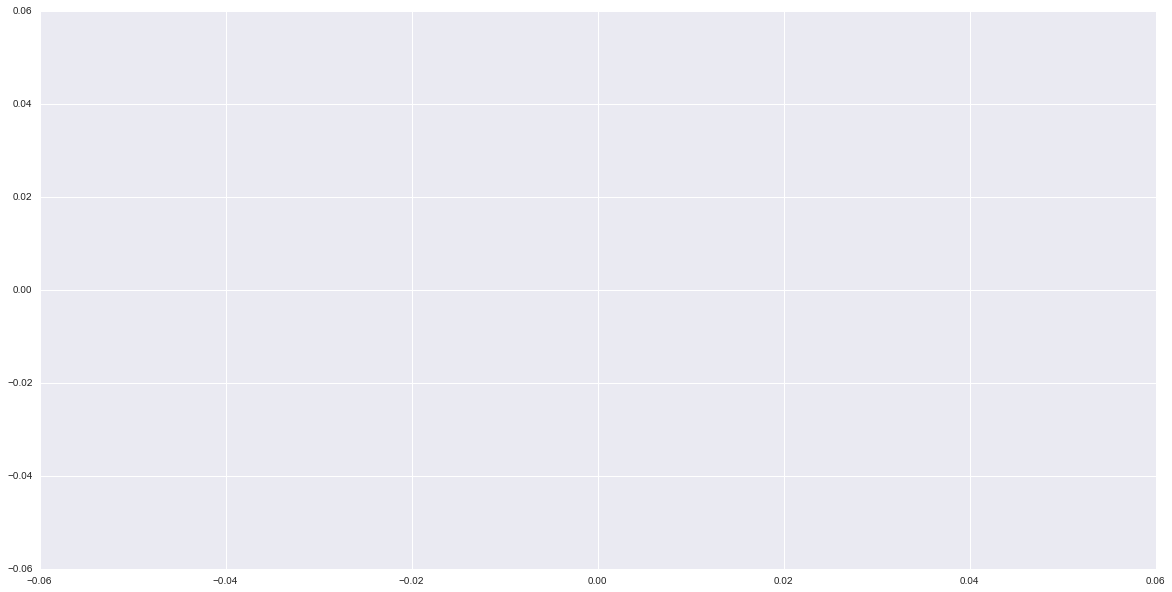

In [204]:
plt.figure(figsize=(20,10))
sns.distplot(mov.rev_totalGross_ADJ, rug=True)
#sns.boxplot(mov.rev_totalGross_ADJ)
#mov.rev_totalGross_ADJ.dropna(inplace=True) #IMPUTE (delete in this case, all gross revs missing)

In [302]:
mov['rev_totalGross_ADJ'].fillna(mov.groupby(['year','distributor','genre_bomojo'])['rev_totalGross_ADJ'].transform('median'),inplace=True)

In [303]:
# dont think it caught any, try without year
mov['rev_totalGross_ADJ'].fillna(mov.groupby(['distributor','genre_bomojo'])['rev_totalGross_ADJ'].transform('median'),inplace=True)

In [316]:
#sum(mov.rev_totalGross_ADJ.isnull()) #caught all!
#sum(mov.rev_opening_ADJ.isnull())
sum(mov.prod_budget_ADJ.isnull())

2997

In [306]:
#Next, we'll look at rev_opening_ADJ
#first, impute by mean revenue of distributor and genre for that year,
mov['rev_opening_ADJ'].fillna(mov.groupby(['year','distributor','genre_bomojo'])['rev_opening_ADJ'].transform('mean'), inplace=True)

#only catches a few because of the year constraint, now impute based on distributor and genre
mov['rev_opening_ADJ'].fillna(mov.groupby(['distributor','genre_bomojo'])['rev_opening_ADJ'].transform('median'), inplace=True)
#fills about a 2/3rds of Nas, drop the rest...

mov['rev_opening_ADJ'].dropna(inplace=True)



In [307]:
#mov.sort_values(by='rev_opening_ADJ', ascending=False).tail(50)
#get rid of anything < 1000
mov.sort_index(inplace=True)
mov=mov[mov.rev_opening_ADJ >= 15000]

In [308]:
#Next, prod_budget!! My na's are 0s here, convert to Nas
mov.prod_budget_ADJ[mov.prod_budget_ADJ==0]=np.nan

/Users/ash/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [309]:
sum(mov.prod_budget_ADJ.isnull())

3312

In [310]:
#PRODUCTION BUDGET SI A SENSITIVE PREDICTOR, don't want to go crazy with imputing. Will impute based on median for that year.

mov.prod_budget_ADJ.fillna(mov.groupby(['year','distributor','genre_bomojo'])['prod_budget_ADJ'].transform('median'), inplace=True)

In [311]:
#got it down by 300-ish, still a lot left. CHECK FOR SYSTEMATICITY, create indicator variable for prod_budget_ADJ == NaN
mov['is_missing_prodbudgetADJ']=mov['prod_budget'].apply(lambda val: 0 if val>0 else 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1f629fe10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1fdf85910>]], dtype=object)

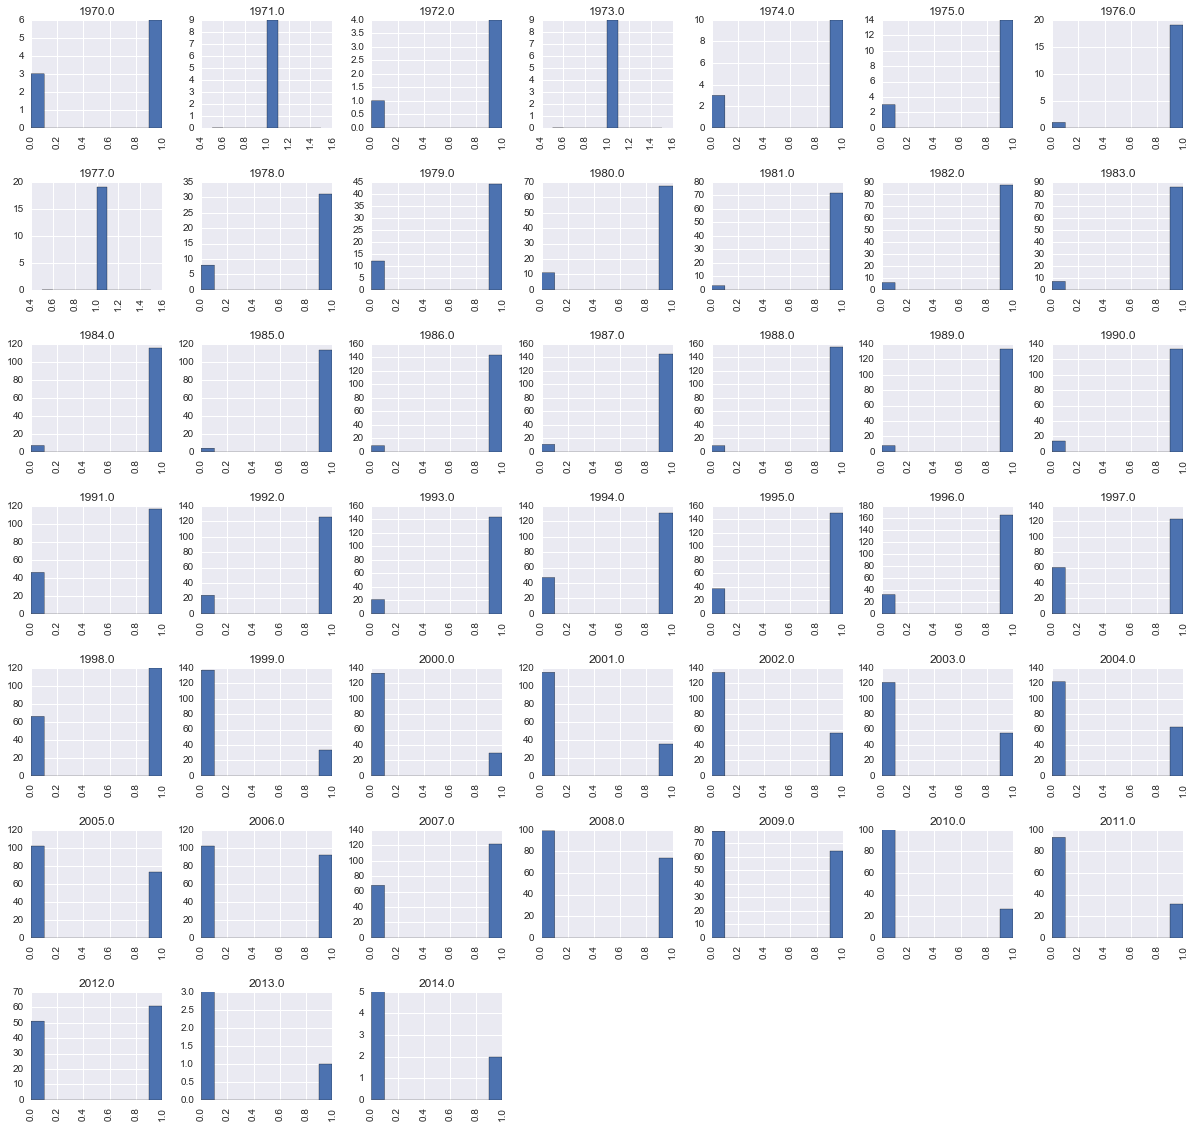

In [314]:
#mov.prod_budget_ADJ.fillna(mov.groupby(['distributor','genre_bomojo'])['prod_budget_ADJ'].transform('median'), inplace=True)
mov.hist('is_missing_prodbudgetADJ',by='Year', figsize=(20,20))

In [315]:
#mov.prod_budget_ADJ.fillna(mov.groupby(['distributor'])['prod_budget_ADJ'].transform('median'), inplace=True)
#mov=mov[mov.releaseYear<=2014]
mov.shape

(5229, 27)

In [317]:
#Use Joel's suggestion of using a linear combination of other predictors to impute, also create an indicator to indicate missing values (call out the bias in data)
#Usually production budget for low budget films that didn't do well is pretty low. 
#one way is to run a linear reg on B1*rev_totalGross_ADJ + B2*rev_opening_ADJ = prod_budget_ADJ, use the parameters to impute missing vals

revs = pd.DataFrame({'gross':mov.loc[mov.prod_budget_ADJ.notnull(), 'rev_totalGross_ADJ'],
                     'opening':mov.loc[mov.prod_budget_ADJ.notnull(), 'rev_opening_ADJ'],
                    'prodbudget':mov.loc[mov.prod_budget_ADJ.notnull(),'prod_budget_ADJ']})
revs=revs.reset_index()

In [318]:
#not much of a relationship, but it's the best we have, so we'll use to impute
revs_fit = (sm.OLS(revs.prodbudget, revs[['gross','opening']],missing='drop')).fit()
revs_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             prodbudget   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 27 Apr 2016   Prob (F-statistic):           1.13e-91
Time:                        15:32:03   Log-Likelihood:                -44027.
No. Observations:                2232   AIC:                         8.806e+04
Df Residuals:                    2230   BIC:                         8.807e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gross          0.1255      0.006     20.703      0.000         0.114     0.137
opening    -2.248e-06   2.57e-05     -0.088      0.930     -5.26e-05  4.81e-05
==============================================================================
Omnibus:                     2930.119   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1510591.980
Skew:                           6.781   Prob(JB):                         0.00
Kurtosis:                     129.724   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

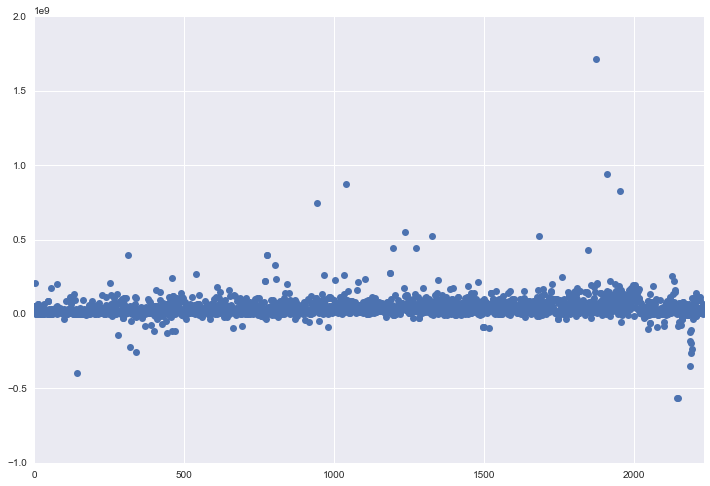

In [319]:
#resid errors are homoskedastic
revs_fit.resid.plot(style='o', figsize=(12,8))

In [320]:
#okay, we have a rough model. Let's impute (predict) prod_budget_ADJ
mov.loc[mov.prod_budget_ADJ.isnull(),'prod_budget_ADJ']=revs_fit.predict(mov.loc[mov.prod_budget_ADJ.isnull(), ['rev_totalGross_ADJ','rev_opening_ADJ']])

In [321]:
#mov.prod_budget_ADJ.dropna(inplace=True)
sum(mov.prod_budget_ADJ.isnull())

0

In [322]:
mov.head()

,Unnamed: 0,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,rev_totalGross,...,releaseYear,Year,AvgPrice,rev_opening_ADJ,rev_totalGross_ADJ,year,CPI,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ
1,890,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,NaN,triptobountiful,18365865.06860,...,1985,1985,3.5,20560.131429,4.502261e+07,1985,107.6,5650869.561865,0.106507,1
3,240,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,NaN,breakingaway,56370318.57600,...,1979,1979,2.5,60753.264000,1.934629e+08,1979,72.6,24281886.199245,0.052415,1
6,3773,Jeffrey Blitz,ThinkFilm,Documentary,G,Spellbound,2003-04-30,NaN,spellbound,8191870.83000,...,2003,2003,6.0,25036.440000,1.171438e+07,2003,184.0,1470292.595044,0.018688,1
7,4000,"Zana Briski, Ross Kauffman",ThinkFilm,Documentary,R,Born into Brothels,2004-12-08,NaN,bornintobrothels,4864390.86774,...,2004,2004,6.2,20211.435484,6.731689e+06,2004,188.9,844906.581073,0.016479,1
13,428,Albert Brooks,Columbia,Romantic Comedy,R,Modern Romance,1981-03-13,NaN,modernromance,9100017.91111,...,1981,1981,2.7,57915.000000,2.891783e+07,1981,90.9,3629530.152339,0.008622,1


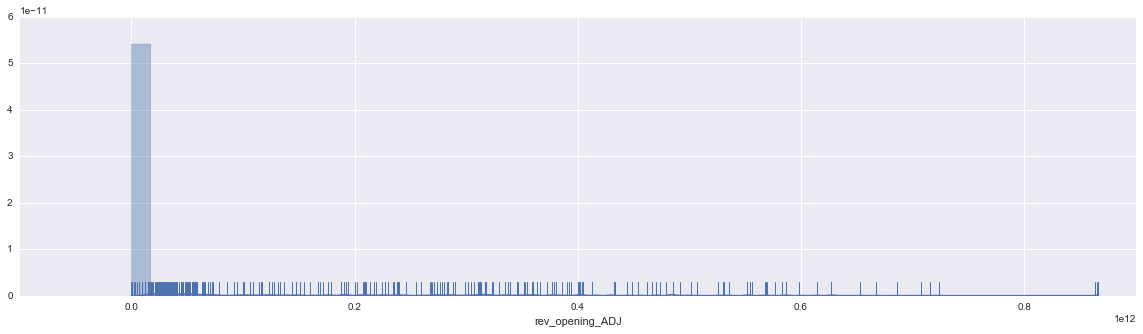

In [323]:
plt.figure(figsize=(20,5))
sns.distplot(mov.rev_opening_ADJ, rug=True)

In [324]:
#mov.sort_index(inplace=True)
mov.shape

(5229, 27)

In [325]:
mov.sort_values(by='rev_totalGross_ADJ', ascending=False).tail(25)

# movies at the higher end are just blockbusters, not corrupt data. Look at rev_totalGross_ADJ that's low
# remove anything that's rev_totalGross_ADJ < 5000

mov=mov[mov.rev_totalGross_ADJ>10000]

In [326]:
mov.sort_values(by='prod_budget_ADJ', ascending=False).tail(25)

,Unnamed: 0,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,rev_totalGross,...,releaseYear,Year,AvgPrice,rev_opening_ADJ,rev_totalGross_ADJ,year,CPI,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ
420,5079,Dror Soref,Anchor Bay Films,Thriller,R,Not Forgotten,2009-05-15,NaN,notforgotten,61483.136000,...,2009,2009,7.5,2.112739e+04,70336.707584,2009,214.537,8828.041226,3.939402e-05,1
269,4100,Shane Carruth,ThinkFilm,Unknown,PG-13,Primer,2004-10-08,1,primer,587813.032258,...,2004,2004,6.2,3.897257e+04,813457.389802,2004,188.900,8819.481207,1.338926e-04,0
792,4716,Andrew Black,First Independent Pictures,Comedy,PG-13,Moving McAllister,2007-09-14,NaN,movingmcallister,53672.947059,...,2007,2007,6.8,3.616849e+04,67722.630259,2007,207.300,8499.909794,6.019698e-07,1
374,4571,Chris Chan Lee,Indican,Drama,R,Undoing,2008-01-04,NaN,undoing,54379.073239,...,2008,2008,7.1,1.941376e+04,65714.429351,2008,215.303,8247.894489,5.811927e-05,1
684,4196,John Mallory Asher,First Look,Comedy,R,Dirty Love,2005-09-23,NaN,dirtylove,48395.221875,...,2005,2005,6.4,3.121109e+04,64879.844326,2005,195.300,8143.117680,1.513698e-06,1
1016,2381,Wallace Wolodarsky,IRS Media,Unknown,R,Coldblooded,1995-09-15,NaN,coldblooded,32320.660465,...,1995,1995,4.3,1.680682e+04,64490.992277,1995,152.400,8094.344526,1.312135e-07,1
601,4155,"Adam Del Deo, James D. Stern",Fine Line,Documentary,PG,The Year of the Yao,2005-04-15,NaN,yearoftheyao,47714.184375,...,2005,2005,6.4,3.730021e+04,63966.828428,2005,195.300,8028.509699,3.831343e-06,1
661,5056,Robert Iscove,Screen Media,Drama,PG-13,Love N' Dancing,2009-05-08,NaN,lovendancing,54696.928000,...,2009,2009,7.5,3.046701e+04,62573.285632,2009,214.537,7853.618955,1.926022e-06,1
1144,3390,Rob Morrow,Andora Pictures,Unknown,R,Maze,2001-11-09,NaN,maze,39898.532143,...,2001,2001,5.6,2.600659e+04,61130.251033,2001,177.100,7672.511071,5.194455e-08,1
1429,118,Michael Ritchie,Freestyle Releasing,Drama,PG-13,Smile,2005-04-08,NaN,smile,44016.740625,...,2005,2005,6.4,7.103764e+04,59009.942900,2005,195.300,7406.286103,NaN,1


In [327]:
mov['CULT_INDEX'] = mov.rev_totalGross_ADJ/((mov.rev_opening_ADJ**2)*(mov.num_theaters))
mov=mov.sort_values(by='CULT_INDEX',ascending=False)

In [266]:
#MANUALLY ASSIGN SOME MORE CULT STATUSES
mov.to_csv('./movie_df.csv',header=True,encoding='utf-8')

In [267]:
#numericals are imputed.
pickle.dump(mov, open('movie_DF_0427.p', 'wb'))

In [268]:
mov = pd.read_csv('./movie_df.csv',header=0,encoding='utf-8')

In [269]:
mov.head()

,Unnamed: 0,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,rev_totalGross,...,releaseYear,Year,AvgPrice,rev_opening_ADJ,rev_totalGross_ADJ,year,CPI,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ
0,149,Steven Spielberg,Columbia,Sci-Fi,PG,Close Encounters of the Third Kind,1977-11-16,NaN,closeencountersofthethirdkind,4.539423e+08,...,1977,1977,2.2,2535.000000,1.770375e+09,1977,60.6,78547854.785500,0.158329,0
1,890,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,NaN,triptobountiful,1.836587e+07,...,1985,1985,3.5,20560.131429,4.502261e+07,1985,107.6,5598779.612020,0.106507,1
2,5541,Rodrigo Cortés,Wellspring,Foreign,Unrated,Red Lights,2004-08-20,NaN,redlights,9.324910e+05,...,2004,2004,6.2,4431.154839,1.290447e+06,2004,188.9,160473.372630,0.065721,1
3,240,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,NaN,breakingaway,5.637032e+07,...,1979,1979,2.5,60753.264000,1.934629e+08,1979,72.6,24058054.730200,0.052415,1
4,4508,Kelly Reichardt,Kino,Drama,Unrated,Old Joy,2006-08-25,NaN,oldjoy,3.378184e+05,...,2006,2006,6.5,4369.200000,4.459202e+05,2006,201.6,55452.341557,0.023359,1


In [328]:
mov.shape

(5229, 27)

In [329]:
# CULTINDEX is catching a lot of false positives with rev_opening_ADJ < 20000; remove maybe less than 15000
mov = mov[mov.rev_opening_ADJ>15000]

In [330]:
mov.shape

(5229, 27)

In [331]:
mov=mov.sort_index()

In [332]:



mov['CULT_INDEX'] = mov.rev_totalGross_ADJ/((mov.rev_opening_ADJ**2)*(mov.num_theaters))
mov=mov.sort_values(by='CULT_INDEX',ascending=False)

In [283]:
mov.columns

Index([              u'Unnamed: 0',                 u'director',
                    u'distributor',             u'genre_bomojo',
                         u'rating',                    u'title',
                    u'releaseDate',                   u'isCult',
                     u'canontitle',           u'rev_totalGross',
                    u'rev_opening',             u'num_theaters',
                        u'runtime',              u'prod_budget',
                u'rev_postOpening',                u'leadActor',
                   u'runtime_mins',              u'releaseYear',
                           u'Year',                 u'AvgPrice',
                u'rev_opening_ADJ',       u'rev_totalGross_ADJ',
                           u'year',                      u'CPI',
                u'prod_budget_ADJ',               u'CULT_INDEX',
       u'is_missing_prodbudgetADJ'],
      dtype='object')

In [288]:
#HAVENT EXPLORED numTheaters!
#IMPUTE by year, studio, strategy (take mean)

mov.num_theaters.fillna(mov.groupby(['Year','distributor'])['num_theaters'].transform('mean'), inplace=True)

In [291]:
mov.num_theaters.fillna(mov.groupby(['distributor'])['num_theaters'].transform('mean'), inplace=True)

In [333]:
sum(mov.num_theaters.isnull())

0

In [294]:
mov=mov[mov.num_theaters.notnull()]

In [295]:
sum(mov.num_theaters.isnull())

0

In [296]:
mov.shape

(5229, 27)

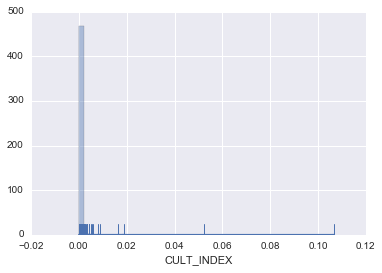

In [334]:
sns.distplot(mov.CULT_INDEX,rug=True)

In [517]:
pickle.dump(mov, open('movie_DF_0427.p', 'wb'))

In [490]:
#look at cult index for cult labels and non cult

nocult = mov[mov.isCult.isnull()]
cult = mov[mov.isCult.notnull()]

In [411]:
mov.loc[mov.isCult.isnull(),'isCult']=0
mov.head()

,Unnamed: 0,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,rev_totalGross,...,releaseYear,Year,AvgPrice,rev_opening_ADJ,rev_totalGross_ADJ,year,CPI,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ
1,890,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,0,triptobountiful,18365865.06860,...,1985,1985,3.5,20560.131429,4.502261e+07,1985,107.6,5650869.561865,0.106507,1
3,240,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,0,breakingaway,56370318.57600,...,1979,1979,2.5,60753.264000,1.934629e+08,1979,72.6,24281886.199245,0.052415,1
6,3773,Jeffrey Blitz,ThinkFilm,Documentary,G,Spellbound,2003-04-30,0,spellbound,8191870.83000,...,2003,2003,6.0,25036.440000,1.171438e+07,2003,184.0,1470292.595044,0.018688,1
7,4000,"Zana Briski, Ross Kauffman",ThinkFilm,Documentary,R,Born into Brothels,2004-12-08,0,bornintobrothels,4864390.86774,...,2004,2004,6.2,20211.435484,6.731689e+06,2004,188.9,844906.581073,0.016479,1
13,428,Albert Brooks,Columbia,Romantic Comedy,R,Modern Romance,1981-03-13,0,modernromance,9100017.91111,...,1981,1981,2.7,57915.000000,2.891783e+07,1981,90.9,3629530.152339,0.008622,1


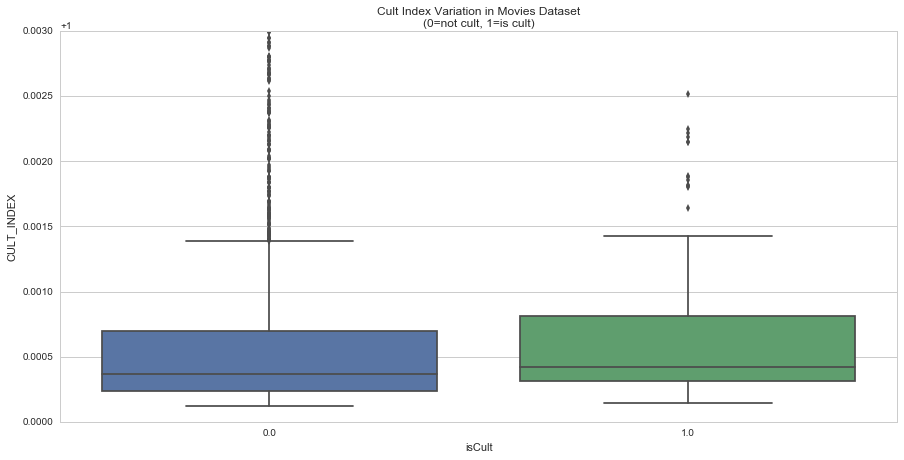

In [519]:

#f, axes = plt.subplots(1, 2, figsize=(20, 10))
#sns.despine(left=True)
plt.figure(figsize=(15, 7))
sns.set_style('whitegrid')

#movtemp = mov[mov.CULT_INDEX<2]

sns.boxplot(x='isCult',y='CULT_INDEX',data=mov)
plt.ylim(1,1.003)
plt.title('Cult Index Variation in Movies Dataset\n(0=not cult, 1=is cult)')

#index in general is very small. Jack it up. Also, try to weight factors in favor of cults more.

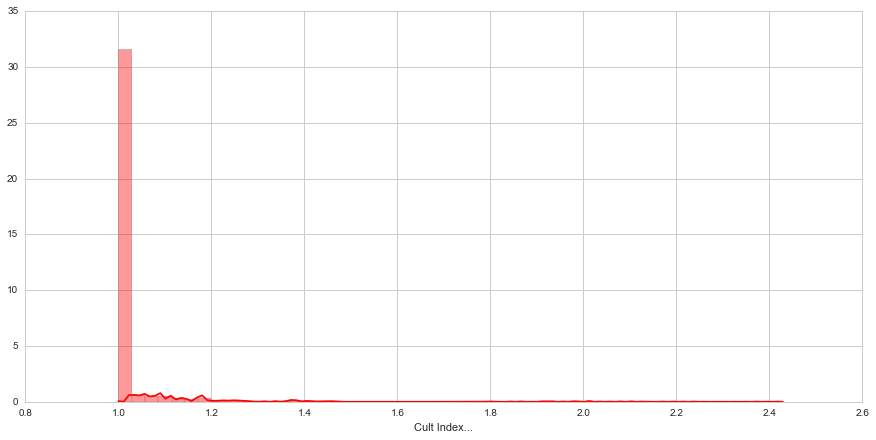

In [491]:
plt.figure(figsize=(15, 7))
sns.set_style('whitegrid')

sns.distplot(cult.CULT_INDEX,
            rug=False, axlabel='Cult Index...', 
            color='r')

In [513]:
mov['CULT_INDEX'] = np.exp(np.log(mov.rev_totalGross_ADJ)/(np.log(mov.rev_opening_ADJ**2)*(mov.num_theaters+1)))
mov=mov.sort_values(by='CULT_INDEX',ascending=False)

In [514]:
pd.set_option('display.max_columns', None)
mov.head()

,Unnamed: 0,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,rev_totalGross,rev_opening,num_theaters,runtime,prod_budget,rev_postOpening,leadActor,runtime_mins,releaseYear,Year,AvgPrice,rev_opening_ADJ,rev_totalGross_ADJ,year,CPI,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ
1,890,Peter Masterson,Island Pictures,Drama,PG,The Trip to Bountiful,1985-12-20,0,triptobountiful,18365865.06860,8387,1,1 hrs. 48 min.,0,4.500205e+07,Geraldine Page,108,1985,1985,3.5,20560.131429,4.502261e+07,1985,107.6,5650869.561865,1.558343,1
3,240,Peter Yates,Fox,Comedy / Drama,PG,Breaking Away,1979-07-13,0,breakingaway,56370318.57600,17702,1,1 hrs. 40 min.,0,1.934022e+08,Dennis Christopher,100,1979,1979,2.5,60753.264000,1.934629e+08,1979,72.6,24281886.199245,1.541993,1
6,3773,Jeffrey Blitz,ThinkFilm,Documentary,G,Spellbound,2003-04-30,0,spellbound,8191870.83000,17508,1,1 hrs. 37 min.,0,1.168934e+07,the 1999 Scripps National Spelling Bee,97,2003,2003,6.0,25036.440000,1.171438e+07,2003,184.0,1470292.595044,1.494456,1
7,4000,"Zana Briski, Ross Kauffman",ThinkFilm,Documentary,R,Born into Brothels,2004-12-08,0,bornintobrothels,4864390.86774,14605,1,1 hrs. 25 min.,0,6.711478e+06,the children of prostitutes in India,85,2004,2004,6.2,20211.435484,6.731689e+06,2004,188.9,844906.581073,1.486565,1
13,428,Albert Brooks,Columbia,Romantic Comedy,R,Modern Romance,1981-03-13,0,modernromance,9100017.91111,18225,1,1 hrs. 33 min.,0,2.885992e+07,Albert Brooks,93,1981,1981,2.7,57915.000000,2.891783e+07,1981,90.9,3629530.152339,1.479403,1


In [ ]:
#CATEGORICALSSSS
